### Загрузить файл hr.csv.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Рассчитать и визуализировать корреляционную матрицу для переменных.

In [4]:
hr_corr = hr.corr()
hr_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


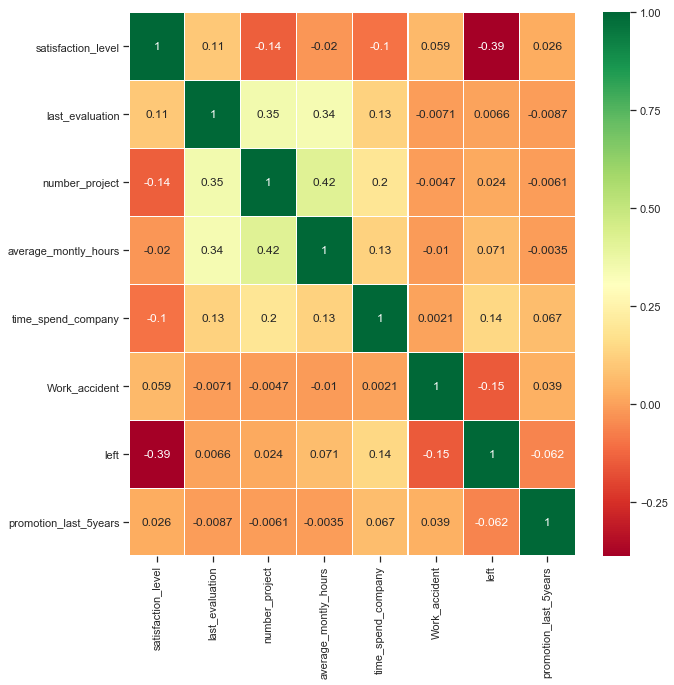

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [8]:
import pandas_profiling
hr.profile_report()

### Визуализировать несколько взаимосвязей между переменными.

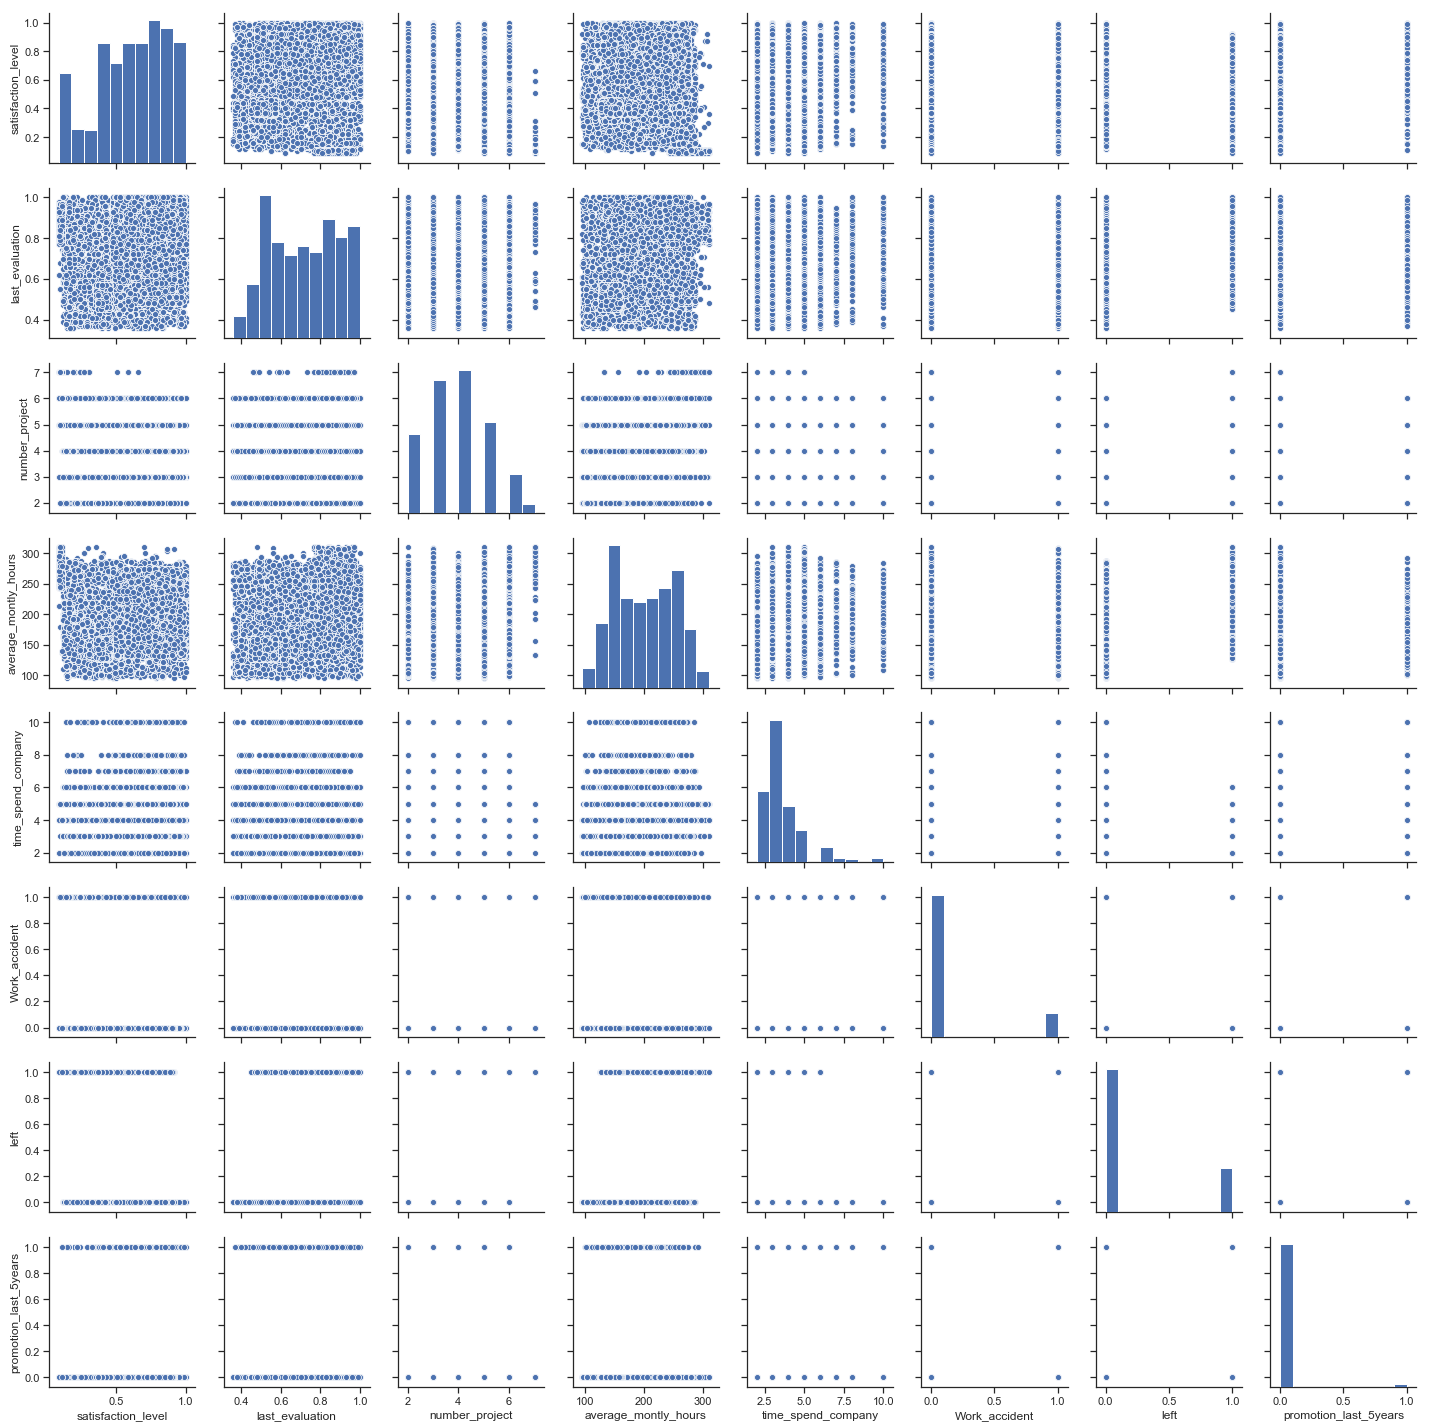

In [41]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(hr)

### С использованием t-test статистики проверить взаимосвязи между несколькими переменными

#### Сравним уровень удовлетворенности у тех, кто работает в компании и у тех, кто уволился.

In [72]:
left_0 = hr[hr['left']==0]['satisfaction_level']
left_1 = hr[hr['left']==1]['satisfaction_level']
stats.ttest_ind(left_0, left_1)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

Так как t-value равно 51.6 и p-value меньше 0.05, satisfaction_level различается у двух групп сотрудников. Значит уровень удовлетворенности может являться причиной увольнения.

#### Сравним уровень удовлетворенности у групп сотрудников с разным уровнем зарплаты.

In [74]:
hr['salary_1'] = hr['salary']
hr.loc[hr['salary'] == 'low', 'salary_1'] = 0
hr.loc[hr['salary'] == 'medium', 'salary_1'] = 1
hr.loc[hr['salary'] == 'high', 'salary_1'] = 2

sal_0 = hr[hr['salary_1']==0]['satisfaction_level']
sal_1 = hr[hr['salary_1']==1]['satisfaction_level']
sal_2 = hr[hr['salary_1']==2]['satisfaction_level']

stats.f_oneway(sal_0, sal_1, sal_2)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп с разным уровнем зарплаты. То есть зарплата может влиять на уровень удовлетворенности.

### Рассчитать сколько работников работает в каждом департаменте.

In [55]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### Показать распределение сотрудников по зарплатам.

In [57]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

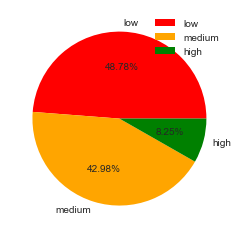

In [82]:
size = list(hr['salary'].value_counts())
colors = ['red', 'orange', 'green']
labels = "low", "medium", "high"


plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

### Показать распределение сотрудников по зарплатам совместно с департаментами

In [67]:
hr.groupby(['sales', 'salary'])['satisfaction_level'].count()

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

### Сколько сотрудников покинули компанию

In [88]:
hr[lambda x: x['left'] == 1]['left'].count()

3571

### Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

#### Посмотрим после скольких лет работы в компании сотрудники становятся лояльными и не покидают компанию.

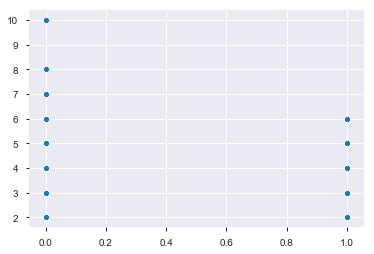

In [34]:
plt.scatter(hr['left'], hr['time_spend_company'], marker='.')
plt.show()

По графику видно, что сотрудники, которые проработали в компании более 6 лет, не увольняются.

#### Предлоложим, что увольнения сотрудников связаны продвижением по карьерной лестнице и удовлетворенностью.

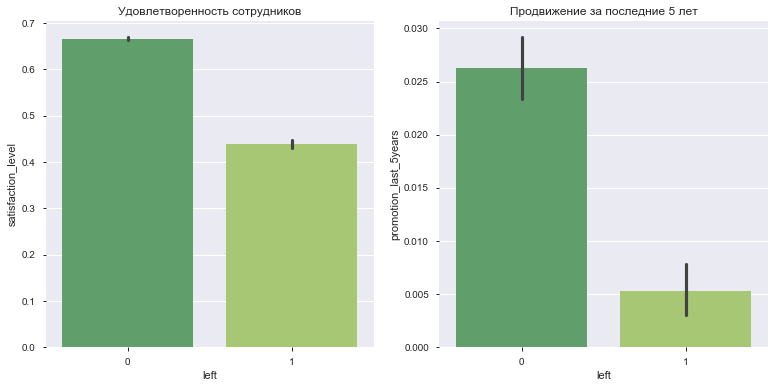

In [61]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x='left',data = hr, y='satisfaction_level', palette='summer')
plt.title('Удовлетворенность сотрудников')
plt.subplot(1,3,2)
sns.barplot(x='left',data = hr, y='promotion_last_5years', palette='summer')
plt.title('Продвижение за последние 5 лет')
plt.show()


По графику видно, что у уволившихся сотрудников ниже уровень удовлетворенности. Также видно, что сотрудники, которые получали повышение последние 5 лет, реже покидают компанию.

#### Предположим, что чаще увольняются сотрудники с более низкой зарплатой

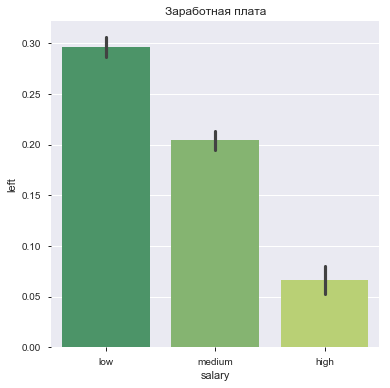

In [62]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,3)
sns.barplot(x='salary',data = hr, y='left', palette='summer')
plt.title('Заработная плата')
plt.show()

Сотруники с высокой зарплатой увольняются реже.